In [1]:
import nd2
import numpy as np
from skimage.io import imsave,imread
import os
import subprocess
import h5py
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
from scipy.optimize import curve_fit
import shutil
from skimage import measure
from matplotlib.path import Path

In [29]:
nd2_dir = '/Users/zhengj10/Desktop/Test'
# nd2_dir = '/Volumes/imaging/Abhi/T-GECO and GCaMP Oct 5 2022'
sum_dir = os.path.join(nd2_dir,'summary')
if not os.path.exists(sum_dir):
    os.makedirs(sum_dir)


In [10]:
fit_files = glob(sum_dir+'/*Bleach*.npy')
fit_files = sorted(fit_files)
fit_files
for f in fit_files:
    file = os.path.basename(f)
    file_info = file.split('_')[0]+' '+file.split('_')[1]+' '+file.split('_')[-1].split('.')[0]
    data = np.load(f)
    print(file_info,data)

GCaMP6s W01 roi#1 [-2.44154598e+01 -3.52579141e-02  4.50701316e+02]
GCaMP6s W01 roi#10 [ 6.38396925e+01 -3.74291305e-02  4.74180451e+02]
GCaMP6s W01 roi#11 [ 1.03946927e+01 -3.57963168e-02  4.79478409e+02]
GCaMP6s W01 roi#12 [-1.95896819e+03 -3.32550151e-07  2.43041148e+03]
GCaMP6s W01 roi#13 [ 2.94378922e+00 -3.48571641e-03  4.71889779e+02]
GCaMP6s W01 roi#14 [ 5.51054356e+00 -1.93382202e-03  4.35989777e+02]
GCaMP6s W01 roi#15 [ 1.04631473e+03 -4.45865007e-07 -5.84130700e+02]
GCaMP6s W01 roi#16 [ 1.98210055e+01 -3.54870695e-02  4.69775610e+02]
GCaMP6s W01 roi#17 [ 5.52629967e+01 -3.76283646e-02  4.66072214e+02]
GCaMP6s W01 roi#18 [ 2.34654072e+03 -3.64851386e-07 -1.89849779e+03]
GCaMP6s W01 roi#19 nan
GCaMP6s W01 roi#2 [ 2.15303764e+03 -3.76807778e-07 -1.67825491e+03]
GCaMP6s W01 roi#20 nan
GCaMP6s W01 roi#21 [ 1.81983011e+00 -2.44697604e-03  4.63963290e+02]
GCaMP6s W01 roi#22 [ 2.90319793e+00 -8.17445990e-03  4.54154211e+02]
GCaMP6s W01 roi#23 [ 7.86009379e+01 -3.78804666e-02  4.5474

GCaMP8s W02 roi#25 [ 3.79406923e+03 -3.66747785e-07 -3.34708280e+03]
GCaMP8s W02 roi#26 [ 3.98442133e+00 -3.12360434e-02  4.54823237e+02]
GCaMP8s W02 roi#3 [ 3.50323210e+00 -8.93092729e-04  4.59098168e+02]
GCaMP8s W02 roi#4 [ 1.37523828e+00 -7.03878540e-03  4.68260387e+02]
GCaMP8s W02 roi#5 [ 2.90211070e+01 -3.52801156e-02  4.60916409e+02]
GCaMP8s W02 roi#6 [ 4.77568605e+01 -3.65435997e-02  4.50188790e+02]
GCaMP8s W02 roi#7 [-1.07986940e+02 -3.80328973e-02  4.56640927e+02]
GCaMP8s W02 roi#8 nan
GCaMP8s W02 roi#9 nan
GCaMP8s W03 roi#1 [-9.35542396e+00 -1.34158186e-03  5.50307777e+02]
GCaMP8s W03 roi#10 [ 3.21166509e+01 -3.63490585e-02  4.60740729e+02]
GCaMP8s W03 roi#11 [ 2.93424644e+01 -3.54717156e-02  4.55131676e+02]
GCaMP8s W03 roi#12 nan
GCaMP8s W03 roi#13 [ 1.92903123e+01 -3.88621491e-02  4.67082679e+02]
GCaMP8s W03 roi#14 [-8.77187706e+03 -3.90158444e-07  9.22078995e+03]
GCaMP8s W03 roi#15 [ 1.32228413e+01 -3.47072408e-02  4.51349728e+02]
GCaMP8s W03 roi#16 [ 2.18044952e+01 -3.533

T-GECO1 W02 roi#61 [ 7.01966315e+01 -2.39425558e-04  5.06143523e+02]
T-GECO1 W02 roi#62 [ 2.82754273e+01 -9.12019334e-04  5.56882472e+02]
T-GECO1 W02 roi#63 [ 4.50679729e+01 -3.85498628e-04  5.72558831e+02]
T-GECO1 W02 roi#64 [ 3.49919666e+01 -5.18448637e-04  5.11220151e+02]
T-GECO1 W02 roi#65 [ 5.74084313e+01 -4.79772234e-04  5.91522654e+02]
T-GECO1 W02 roi#66 [ 3.58607694e+01 -4.65634465e-04  5.15381445e+02]
T-GECO1 W02 roi#67 [ 4.00799019e+01 -3.30405349e-04  4.91258194e+02]
T-GECO1 W02 roi#68 [ 3.29466363e+01 -5.01409696e-04  5.26327982e+02]
T-GECO1 W02 roi#69 [ 2.88680737e+01 -4.55626603e-04  5.15250935e+02]
T-GECO1 W02 roi#7 nan
T-GECO1 W02 roi#70 [ 1.68666178e+01 -9.27145764e-04  4.98263366e+02]
T-GECO1 W02 roi#71 [ 5.21749757e+01 -2.43641729e-04  4.98623090e+02]
T-GECO1 W02 roi#72 [ 3.17652315e+01 -6.73513690e-04  5.14261804e+02]
T-GECO1 W02 roi#73 [ 2.20690377e+01 -9.58485174e-04  5.28658139e+02]
T-GECO1 W02 roi#74 [ 4.03471697e+01 -4.52941842e-04  5.52064551e+02]
T-GECO1 W02 

In [30]:
fit_files = glob(sum_dir+'/*Bleach*.npy')
fit_files = sorted(fit_files)
fit_files
for f in fit_files:
    file = os.path.basename(f)
    file_info = file.split('_')[0]+' '+file.split('_')[1]+' '+file.split('_')[-1].split('.')[0]
    data = np.load(f)
    print(file_info,data)

GCaMP6s W01 roi#1 [ 2.13729346e+03 -3.42277380e-07 -1.68544135e+03]
GCaMP6s W01 roi#10 [ 2.08948288e+00 -5.76832932e-03  4.76274731e+02]
GCaMP6s W01 roi#11 [ 2.24014380e+00 -3.44883722e-03  4.78984164e+02]
GCaMP6s W01 roi#12 [ 1.45476118e+00 -1.27992678e-02  4.71045852e+02]
GCaMP6s W01 roi#13 [ 5.64723077e+00 -1.02988077e-02  4.71471344e+02]
GCaMP6s W01 roi#14 [ 1.05355507e+01 -1.14736254e-02  4.38113671e+02]
GCaMP6s W01 roi#15 [ 1.17688228e+00 -1.47497054e-02  4.62906183e+02]
GCaMP6s W01 roi#16 [ 1.30048781e+00 -1.82682359e-01  4.69655610e+02]
GCaMP6s W01 roi#17 [ 2.34093934e+00 -2.61022445e-03  4.67019362e+02]
GCaMP6s W01 roi#18 [ 2.74609639e+03 -3.98077071e-07 -2.29827590e+03]
GCaMP6s W01 roi#19 [ 3.14577711e+03 -4.10081067e-07 -2.68960821e+03]
GCaMP6s W01 roi#2 [ 1.18374049e+00 -2.97510591e-03  4.74472414e+02]
GCaMP6s W01 roi#20 [ 2.22306689e+00 -7.13753783e-03  4.70770138e+02]
GCaMP6s W01 roi#21 [ 9.85920331e-01 -3.18976609e-03  4.64404337e+02]
GCaMP6s W01 roi#22 [ 2.35530170e+00 

(450.0, 600.0)

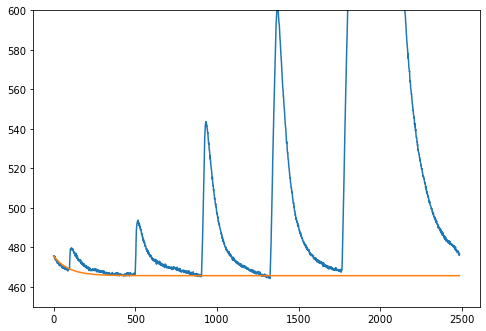

In [39]:
plt.figure(figsize=[8,12])
no = 4
F = np.load(sum_dir+'/GCaMP6s_W01_raw_F_roi#%s.npy' %no)
ax1 = plt.subplot(211)
# ax1.plot(F[3:1000])
ax1.plot(F)
fit = np.load(sum_dir+'/GCaMP6s_W01_Bleach_fit_roi#%s.npy' %no)
x = np.arange(F.shape[0])
y = fit[0]*np.exp(fit[1]*x)+fit[2]
# ax2 = plt.subplot(212)
ax1.plot(x,y)
# ax1.set_xlim([10,2488])
ax1.set_ylim([450,600])

In [21]:
fit

array(nan)